In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from random import randint
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Flatten
from keras.layers import Dense,Input
from keras.models import Sequential
from keras.models import Model
from keras.models import *
from keras.layers import *
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [178]:
train1 = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\train1\\"
train2 = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\train2\\"
train = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\train\\"
test = "C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\test\\"

In [3]:
filenames = sorted(os.listdir(train1))
images = np.empty((256,256),int)
p1 =0
label =[]
for im in filenames:
    img = plt.imread(train1+im)
    img = np.resize(img,(256,256))
    if p1==0:
        images = img
        p1 =1
    else:
        images = np.append(images,img,axis=0)
    res = im[:3]
    label.append(res)
print(images.shape)

(76800, 256)


In [4]:
image_data = np.array(images)
image_data = image_data.astype('float32')
image_data = image_data/255
image_data.shape

(76800, 256)

In [5]:
images = np.reshape(images, [ 300, 256, 256])
Images = np.reshape(images,[300,256,256])
train_images,test_images,train_labels,test_labels = train_test_split(images, label, test_size=0.20, random_state =30)
print("training Images shape",train_images.shape)
print("testing Images shape",test_images.shape)
classes = np.unique(train_labels)
nclasses= len(classes)

print('total no of classes',nclasses)
print('classes',classes)

training Images shape (240, 256, 256)
testing Images shape (60, 256, 256)
total no of classes 4
classes ['cat' 'dog' 'hor' 'hum']


Text(0.5, 1.0, 'ground :dog ')

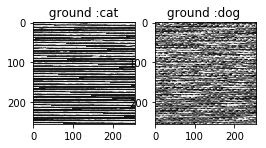

In [6]:
plt.figure(figsize =[4,2])
plt.subplot(1,2,1)
plt.imshow(train_images[0,:,:],cmap ='gray')
plt.title(" ground :{} ".format(train_labels[0]))
plt.subplot(1,2,2)
plt.imshow(test_images[6,:,:],cmap ='gray')
plt.title("ground :{} ".format(test_labels[6]))

In [7]:
img_size = 256
def label_img(name):
    word_label = name.split('.')[0]
    if word_label == 'cat' : return np.array([1, 0])
    else : return np.array([0, 1])
    
def load_training_data():
    train_data =[]
    for img in os.listdir(DIR):
        label = label_img(img)
        path = os.path.join(DIR,img)
        img = cv2.imread(DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        train_data.append([np.array(img),label])
        
    
    return shuffle(train_data)
        

In [8]:
from sklearn.utils import shuffle
DIR =train1
train_data = load_training_data()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[1 0]')

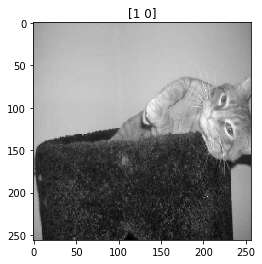

In [9]:
plt.imshow(train_data[3][0],cmap ='gist_gray')
plt.title(train_data[3][1])

In [10]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, 256,256, 1)
trainLabels = np.array([i[1] for i in train_data])

In [11]:
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256,256, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [13]:
history = model.fit(trainImages, trainLabels, batch_size = 32 , epochs = 5, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
300/300 [==============================] - 50s 165ms/step - loss: 0.6567 - acc: 0.6750
Epoch 2/5
300/300 [==============================] - 46s 154ms/step - loss: 0.3534 - acc: 0.8467
Epoch 3/5
300/300 [==============================] - 45s 151ms/step - loss: 0.2394 - acc: 0.9183
Epoch 4/5
300/300 [==============================] - 46s 152ms/step - loss: 0.1162 - acc: 0.9733
Epoch 5/5
300/300 [==============================] - 46s 154ms/step - loss: 0.0963 - acc: 0.9717


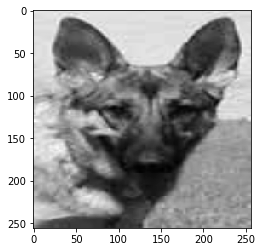

In [14]:
TEST_DIR = test
def load_test_data():
    test_data =[]
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(TEST_DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        test_data.append([np.array(img),label])
        
    
    return shuffle(test_data)
        

test_data = load_test_data()    
plt.imshow(test_data[10][0], cmap = 'gist_gray')

In [15]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, 256,256, 1)
testLabels = np.array([i[1] for i in test_data])

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

16.0


In [16]:
img_size = 256
def label_img1(name):
    word_label = name.split('.')[0]
    if word_label == 'dog' : return np.array([1, 0])
    else : return np.array([0, 1])
    
def load_training_data1():
    train_data1 =[]
    for img in os.listdir(DIR1):
        label = label_img1(img)
        path = os.path.join(DIR1,img)
        img = cv2.imread(DIR1+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        train_data1.append([np.array(img),label])
        
    
    return shuffle(train_data1)

In [17]:
from sklearn.utils import shuffle
DIR1 =train2
train_data1 = load_training_data1()

Text(0.5, 1.0, '[0 1]')

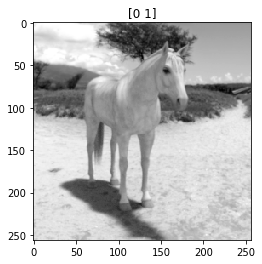

In [18]:
plt.imshow(train_data1[3][0],cmap ='gist_gray')
plt.title(train_data1[3][1])

In [19]:
trainImages1 = np.array([i[0] for i in train_data1]).reshape(-1, 256,256, 1)
trainLabels1 = np.array([i[1] for i in train_data1])

In [20]:
from keras.layers.normalization import BatchNormalization

model1 = Sequential()
model1.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256,256, 1)))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
model1.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
model1.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
model1.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(2, activation = 'softmax'))

In [21]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [22]:
history = model1.fit(trainImages1, trainLabels1, batch_size = 32 , epochs = 5, verbose = 1)

Epoch 1/5
300/300 [==============================] - 49s 164ms/step - loss: 0.7207 - acc: 0.6400
Epoch 2/5
300/300 [==============================] - 47s 158ms/step - loss: 0.3967 - acc: 0.8433
Epoch 3/5
300/300 [==============================] - 45s 151ms/step - loss: 0.2477 - acc: 0.8900
Epoch 4/5
300/300 [==============================] - 47s 157ms/step - loss: 0.1421 - acc: 0.9300
Epoch 5/5
300/300 [==============================] - 46s 155ms/step - loss: 0.1270 - acc: 0.9400


In [142]:
testImages1 = np.array([i[0] for i in test_data1]).reshape(-1, 256,256, 1)
testLabels1 = np.array([i[1] for i in test_data1])

loss, acc = model.evaluate(testImages1, testLabels1, verbose = 0)
print(acc * 100)

16.0


In [147]:
histo = model.predict(testImages)

print("X=%s, Predicted=%s" % (testImages[0], histo[0]))

X=[[[148]
  [143]
  [146]
  ...
  [ 25]
  [ 24]
  [ 23]]

 [[148]
  [143]
  [146]
  ...
  [ 26]
  [ 25]
  [ 25]]

 [[149]
  [143]
  [146]
  ...
  [ 30]
  [ 28]
  [ 27]]

 ...

 [[182]
  [156]
  [161]
  ...
  [ 75]
  [ 79]
  [ 76]]

 [[186]
  [159]
  [157]
  ...
  [ 75]
  [ 77]
  [ 77]]

 [[188]
  [161]
  [154]
  ...
  [ 77]
  [ 76]
  [ 77]]], Predicted=[0.61393833 0.5318758 ]


In [153]:
from keras.preprocessing import image

batch_holder = np.zeros((100, 256,256, 3))
img_dir= test
for i,img in enumerate(os.listdir(img_dir)):
  img = image.load_img(os.path.join(img_dir,img), target_size=(256,256))
  batch_holder[i, :] = img

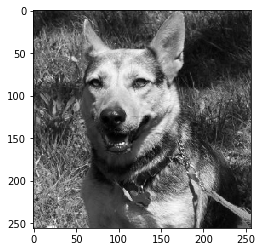

In [23]:
TEST_DIR = test
def load_test_data1():
    test_data1 =[]
    for img in os.listdir(TEST_DIR):
        label = label_img1(img)
        path = os.path.join(TEST_DIR,img)
        img = cv2.imread(TEST_DIR+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        test_data1.append([np.array(img),label])
        
    
    return shuffle(test_data1)
        

test_data1 = load_test_data1()    
plt.imshow(test_data1[10][0], cmap = 'gist_gray')

In [34]:
input = Input(shape =(256,256, 1))
x = Conv2D(32, kernel_size = (3, 3), activation='relu')(input)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(96, kernel_size=(3,3), activation='relu')(x) 
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(96, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3,3), activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

layer = Flatten()(x)
layer = Dense(256, activation='relu')(layer)
layer = Dropout(0.2)(layer)
layer = Dense(128, activation='relu')(layer)
layer = Dense(2, activation = 'softmax')(layer)

model2 = Model(input,layer)

In [35]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [36]:
history = model2.fit(trainImages1, trainLabels1, batch_size = 32 , epochs = 5, verbose = 1)

Epoch 1/5
300/300 [==============================] - 44s 148ms/step - loss: 0.7315 - acc: 0.6467
Epoch 2/5
300/300 [==============================] - 44s 148ms/step - loss: 0.3906 - acc: 0.8633
Epoch 3/5
300/300 [==============================] - 44s 146ms/step - loss: 0.2737 - acc: 0.8733
Epoch 4/5
300/300 [==============================] - 46s 152ms/step - loss: 0.2033 - acc: 0.9267
Epoch 5/5
300/300 [==============================] - 48s 160ms/step - loss: 0.1484 - acc: 0.9433


In [37]:
x1 = Conv2D(32, kernel_size = (3, 3), activation='relu')(input)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, kernel_size=(3,3), activation='relu')(x1)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(96, kernel_size=(3,3), activation='relu')(x1) 
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(96, kernel_size=(3,3), activation='relu')(x1)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Conv2D(64, kernel_size=(3,3), activation='relu')(x1)
x1 = MaxPool2D(pool_size=(2,2))(x1)
x1 = BatchNormalization()(x1)
x1 = Dropout(0.2)(x1)


layer1 = Flatten()(x1)
layer1 = Dense(256, activation='relu')(layer1)
layer1 = Dropout(0.2)(layer1)
layer1 = Dense(128, activation='relu')(layer1)
layer1 = Dense(2, activation = 'softmax')(layer1)

model3 = Model(input,layer1)

In [118]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [39]:
history1 = model3.fit(trainImages, trainLabels, batch_size = 32 , epochs = 5, verbose = 1)

Epoch 1/5
300/300 [==============================] - 45s 151ms/step - loss: 0.7087 - acc: 0.6900
Epoch 2/5
300/300 [==============================] - 48s 160ms/step - loss: 0.3550 - acc: 0.8600
Epoch 3/5
300/300 [==============================] - 45s 149ms/step - loss: 0.2134 - acc: 0.9333
Epoch 4/5
300/300 [==============================] - 45s 149ms/step - loss: 0.2039 - acc: 0.9167
Epoch 5/5
300/300 [==============================] - 45s 151ms/step - loss: 0.1170 - acc: 0.9633


In [119]:
from keras.layers import Activation

input_shape =(256,256,1)
a = Flatten()(x)
a = Activation('relu')(a)
b = Flatten()(x1)
b = Activation('relu')(b)
mergedOut = concatenate([a,b], axis = 0)
mergedOut = Dense(256, activation='relu')(mergedOut)
mergedOut = Dropout(0.2)(mergedOut)
mergedOut = Dense(128, activation='relu')(mergedOut)
mergedOut = Dense(2, activation = 'softmax')(mergedOut)

model4 = Model(input,mergedOut)

In [129]:
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [130]:
model4.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 254, 254, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 254, 254, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_11 (MaxPooling2D) (None, 127, 127, 32) 0           conv2d_11[0][0]                  
__________________________________________________________________________________________________
max_poolin

In [103]:
img_size = 256

def label_img2(name):
    word_label = name.split('.')[0]
    if word_label == 'dog' : return np.array([1])
    else : return np.array([0])
    
def load_training_data2():
    train_data2 =[]
    for img in os.listdir(DIR2):
        label = label_img2(img)
        path = os.path.join(DIR2,img)
        img = cv2.imread(DIR2+img)
        img = cv2.cvtColor(cv2.resize(img,(256,256)),cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        train_data2.append([np.array(img),label])
        
    
    return shuffle(train_data2)

In [104]:
from sklearn.utils import shuffle
DIR2 =train
train_data2 = load_training_data2()

Text(0.5, 1.0, '[1]')

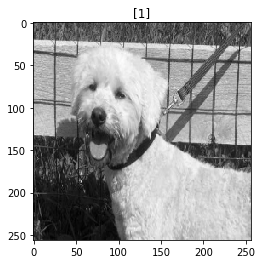

In [105]:
plt.imshow(train_data2[3][0],cmap ='gist_gray')
plt.title(train_data2[3][1])

In [106]:
trainImages2 = np.array([i[0] for i in train_data2]).reshape(-1, 256,256, 1)
trainLabels2 = np.array([i[1] for i in train_data2])

In [111]:
filenames = sorted(os.listdir(train))
p4=0
d4=[]
for img_name in filenames:
    img = plt.imread(train + img_name)
    img  = np.resize(img, (256, 256))
    if p4==0:
      imgs4=(img)
      p4=1
    else:
      imgs4 = np.append(imgs4, img, axis=0)
    res = img_name[:3]
    d4.append(res)
print(d4)
    
print(imgs4.shape)
        
img_data = np.array(imgs4)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat'

(102400, 256)

In [112]:
imgs4 = np.reshape(imgs4, [ 400, 256, 256])
train_images, test_images = train_test_split(imgs4,test_size=0.33, random_state=42)
nRows,nCols = train_images.shape[1:]
nDims = nRows
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(train_images.shape)
print(test_images.shape)

(268, 256, 256)
(132, 256, 256)


In [113]:
imgs = np.reshape(imgs4, [ 400, 256, 256])
train_images, test_images, train_labels, test_labels = train_test_split(imgs4, d4, test_size=0.33, random_state=42)
print('Training data shape : ', train_images.shape, len(train_labels))
print('Testing data shape : ', test_images.shape, len(test_labels))
classes = np.unique(train_labels)
classes=np.append(classes,0)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (268, 256, 256) 268
Testing data shape :  (132, 256, 256) 132
Total number of outputs :  3
Output classes :  ['cat' 'dog' '0']


In [114]:
train_labels=[0 if x=='cat' else 1 for x in train_labels]
print(train_labels)
len(train_labels)

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]


268

In [115]:

test_labels=[0 if x=='cat' else 1 for x in test_labels]
print(test_labels)
len(test_labels)

[1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0]


132

In [116]:
from keras.utils import to_categorical

nRows,nCols = train_images.shape[1:]
nDims = nRows
print(nCols)
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, 1)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, 1)
input_shape = (nRows, nCols, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255
test_data /= 255
print(len(train_labels))
print(len(test_labels))
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
print('Original label : ', train_labels[11])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[11])
print('Original label : ', test_labels[11])
print('After conversion to categorical ( one-hot ) : ', test_labels_one_hot[11])

256
268
132
Original label :  0
After conversion to categorical ( one-hot ) :  [1. 0.]
Original label :  1
After conversion to categorical ( one-hot ) :  [0. 1.]


In [132]:
history3 = model4.fit(train_data,train_labels_one_hot,batch_size=1,epochs=20,validation_data=(test_data, test_labels_one_hot))

Train on 268 samples, validate on 132 samples
Epoch 1/20
268/268 [==============================] - 129s 480ms/step - loss: 0.5709 - acc: 0.7146 - val_loss: 1.0363 - val_acc: 0.5227
Epoch 2/20
268/268 [==============================] - 127s 475ms/step - loss: 0.4160 - acc: 0.8153 - val_loss: 1.4320 - val_acc: 0.5227
Epoch 3/20
268/268 [==============================] - 124s 464ms/step - loss: 0.3651 - acc: 0.8396 - val_loss: 1.8790 - val_acc: 0.4924
Epoch 4/20
268/268 [==============================] - 124s 464ms/step - loss: 0.2494 - acc: 0.9030 - val_loss: 2.4458 - val_acc: 0.4697
Epoch 5/20
268/268 [==============================] - 126s 471ms/step - loss: 0.2468 - acc: 0.8974 - val_loss: 3.5253 - val_acc: 0.4886
Epoch 6/20
268/268 [==============================] - 127s 474ms/step - loss: 0.1634 - acc: 0.9459 - val_loss: 2.0549 - val_acc: 0.4773
Epoch 7/20
268/268 [==============================] - 125s 465ms/step - loss: 0.1638 - acc: 0.9478 - val_loss: 2.3013 - val_acc: 0.4697
Ep

In [136]:
model4.evaluate(test_data, test_labels_one_hot,batch_size= 1)

132/132 [==============================] - 13s 97ms/step


[4.448472937354225, 0.45454545454545453]

In [251]:
imgcat=cv2.imread("C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\test\\1.jpg")
imgdog=cv2.imread("C:\\Users\\JYOTHI PRASANNA\\Desktop\\dog_cat_new\\test\\1.jpg")
imgcat=cv2.resize(imgcat,(256,256))
imgcat = cv2.cvtColor(cv2.resize(imgcat,(256,256)),cv2.COLOR_BGR2GRAY)
imgcat=imgcat.reshape(1,256,256,1)
imgdog=cv2.resize(imgdog,(256,256))
imgdog = cv2.cvtColor(cv2.resize(imgdog,(256,256)),cv2.COLOR_BGR2GRAY)
imgdog=imgdog.reshape(1,256,256,1)
images=([imgcat])
prediction=model4.predict([imgcat],steps=1)

In [252]:
prediction

array([[0., 1.],
       [0., 1.]], dtype=float32)